In [1]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stocks = input("Enter code for stocks:- ")
data = yf.download(stocks, "2008-01-01", "2021-01-10", auto_adjust=True)
data.head()

Enter code for stocks:- NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [3]:
data.shape

(3277, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3277 entries, 2008-01-02 to 2021-01-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3277 non-null   float64
 1   High    3277 non-null   float64
 2   Low     3277 non-null   float64
 3   Close   3277 non-null   float64
 4   Volume  3277 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.6 KB


In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000
mean,3.715238,3.788756,3.636522,3.708571,131335.055844
std,1.831398,1.866788,1.790545,1.826286,54406.943711
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.692000,2.736000,2.644000,2.693000,91733.000000
50%,3.254000,3.313000,3.189000,3.244000,126594.000000
75%,4.159000,4.245000,4.069000,4.154000,161322.000000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


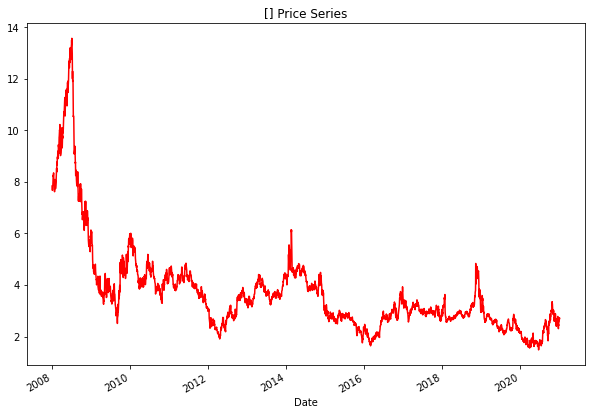

In [6]:
data.Close.plot(figsize=(10, 7),color='r')
plt.title("[] Price Series".format(stocks))
plt.show()

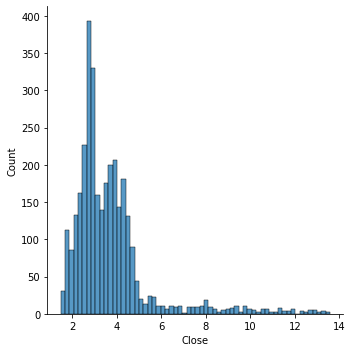

In [7]:
sns.displot(data["Close"])

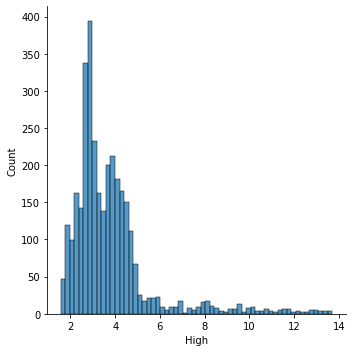

In [8]:
sns.displot(data["High"])

In [9]:
# conclusion

# -shape of the data
# -how our data is distributed
# -It's very non linear "don't use"

#Lenear, Logis, Regularized, SVM

x = data.drop("Close", axis=1)
y = data["Close"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2621, 4)
(656, 4)
(2621,)
(656,)


In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
pred1 = lr.predict(x_test)

In [11]:
pred1

array([ 3.93319128,  3.15371501,  3.95167381,  4.87418637,  2.93911738,
        2.13338898,  1.71564049,  2.65179955,  4.03759023,  2.70074662,
        1.73901714,  3.91207775,  4.3624929 ,  2.68081388,  3.94996676,
        3.0765929 ,  4.0465047 ,  4.11036782,  9.00282632,  5.71461862,
        4.10776862,  4.40348581,  2.99911419,  2.67033077,  2.48330166,
        1.89896628,  3.88211928,  2.61138552,  2.48569124,  2.62072148,
        3.03877394,  3.06278634,  2.80207625,  3.38231023,  2.76878159,
        3.84521525,  2.93344574,  3.70193873,  2.62046865,  3.55362228,
       11.73723367,  6.71784245,  2.96091326,  2.30057948,  2.72725552,
        3.14934421,  2.73283723,  2.60176677, 13.04594461,  3.71205654,
        4.56224156,  3.63963019,  4.29885733,  4.23632315,  2.79332097,
        4.16167503,  3.90151686,  3.35337316,  3.35199296,  4.08511425,
        3.94122824,  2.94494236,  4.40826932,  2.00121755,  3.7554186 ,
        2.85350771,  3.63655968,  3.81162321,  2.96249271,  2.65

In [12]:
# MSe ----> Mean Squared
# RMSE ----> sqrt(MSE)
# r2_square ----> 1.0 # good model

from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test,y_pred):
   # y_test - ground_truth
    # y_pred model predicted

    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2_scores = r2_score(y_test, y_pred)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R2_score: ", r2_scores)
    
calculate_metrics(y_test, pred1)

MSE:  0.0016570615375198668
RMSE:  0.04070702073991496
R2_score:  0.9994122569421702


In [13]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(x_train, y_train)
rl = Ridge().fit(x_train, y_train)

la_p = la.predict(x_test)
rl_p = rl.predict(x_test)

In [14]:
calculate_metrics(y_test, la_p)

MSE:  0.2616626383175135
RMSE:  0.5115297042377046
R2_score:  0.9071908944342887


In [15]:
calculate_metrics(y_test, rl_p)

MSE:  0.0017633476778242748
RMSE:  0.04199223354174287
R2_score:  0.99937455831741


In [16]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {"c": [0.1, 1, 10, 100, 1000,],
             "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
             "kernal": ["rbf"]}


grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


ValueError: Invalid parameter c for estimator SVR(). Check the list of available parameters with `estimator.get_params().keys()`.

In [17]:
svr = SVR(C=10, gamma=0.01, kernel="rbf")
svr.fit(x_train, y_train)
xvr_pred = svr.predict(x_test)

In [18]:
import joblib

joblib.dumps("model.pkl")

ridge_from_joblib = model = joblib.load("model.pkl")

AttributeError: module 'joblib' has no attribute 'dumps'